In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


# Bernoulli Distribution

Like Binomial distribution sets n as the number of trials of a Bernulli experiment, we can produce a set m of events 0 and 1 with $n=1$ and $size=k$

Number of samples = 10000
Probability = 0.2
Mean = 0.2
var = 0.16


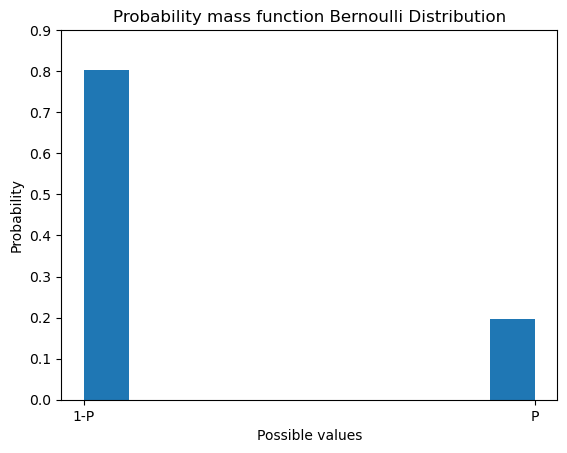

In [2]:
np.random.seed(42)

# Number of trials
n = 1
# Probability of success
p = 0.2
# Number of outputs
size = 10000
samples = np.random.binomial(n, p, size)

mean = samples.mean()
var = samples.var()

print('Number of samples = {}'.format(size))
print('Probability = {}'.format(p))
print('Mean = {}'.format(round(mean,2)))
print('var = {}'.format(round(var,2)))

plt.hist(samples, density=False) #Y axis must be resiez with yticks because density != pdf!!!
locs, _ = plt.yticks()
plt.yticks(locs,np.round(locs/len(samples),3))
plt.xticks([0,1], ['1-P','P'])
plt.xlabel('Possible values')
plt.ylabel('Probability')
plt.title('Probability mass function Bernoulli Distribution')
plt.show()

# Binomial Distribution

$ P[X=k] = \begin{pmatrix} n \\ k \end{pmatrix} p^k (1-p)^{(n-k)}$ 
<br>
With $n$ the number of trials and $k$ the number of times with success.
<br>
$E[X]=np$
<br>
$E[X]=np(1-p)$
<br>
<br>
i.e..: Probability of getting 20 times 6 on a dice after 50 rolls:
$P[X=20] = \begin{pmatrix} 50 \\ 20 \end{pmatrix} p^{20} (1-p)^{(50-20)}$ $\;\;\;\;\;\;$ with $p=1/6$

Number of samples = 100
Probability of success p = 0.17

Simulated probability of getting 20 in 50 trials  = 0.0
Theoretical probability of getting 20 in 50 trials  = 5.430349620903796e-05

Simulated mean = 8.11
Theoretical mean = 8.33

Simulated var = 7.14
Theoretical var = 6.94


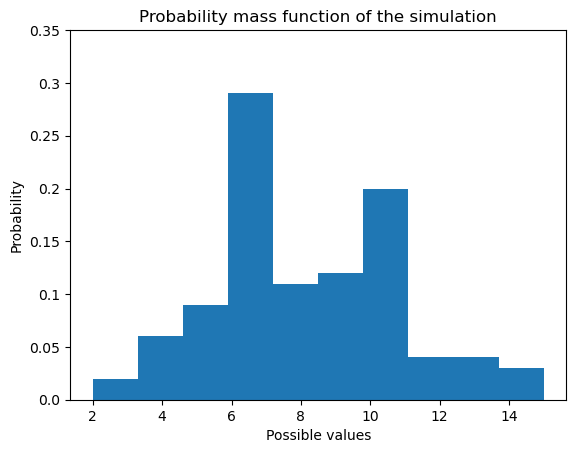

In [3]:
np.random.seed(42)

# Number of trials
n = 50
# Probability of success
p = 1/6
# Number of success per trial
k = 20
# Size of the vector (number of experiments)
size = 100

########################
samples = np.random.binomial(n, p, size)
probability = sum(samples == k)/size
theory_probability = math.factorial(n)/(math.factorial(k)*math.factorial(n-k))*p**k*(1-p)**(n-k)

mean = samples.mean()
var = samples.var()

theory_mean = n*p
theory_var = n*p*(1-p)

print('Number of samples = {}'.format(size))
print('Probability of success p = {}'.format(round(p,2)))
print('')
print('Simulated probability of getting {} in {} trials  = {}'.format(k, n, probability))
print('Theoretical probability of getting {} in {} trials  = {}'.format(k, n, theory_probability))
print('')
print('Simulated mean = {}'.format(round(mean,2)))
print('Theoretical mean = {}'.format(round(theory_mean,2)))
print('')
print('Simulated var = {}'.format(round(var,2)))
print('Theoretical var = {}'.format(round(theory_var,2)))

plt.hist(samples, density=False) #Y axis must be resiez with yticks because density != pdf!!!
locs, _ = plt.yticks()
plt.yticks(locs,np.round(locs/len(samples),3))
# plt.xticks([0,1], ['1-P','P'])
plt.xlabel('Possible values')
plt.ylabel('Probability')
plt.title('Probability mass function of the simulation')
plt.show()

To simulate the probability mass function of the simulation it is possible to repeat many experiments. In this case I prefer to simulate many experiments of the previous experiment, it's just demonstrative of the output of the matrix form for size, it would be faster with size = experiments * initial experiment size.

Number of samples = 20
Probability of success = 0.17

Simulated probability of getting 20 in 50 trials  = 5e-05
Theoretical probability of getting 20 in 50 trials  = 5.430349620903796e-05

Simulated mean = 8.34
Theoretical mean = 8.33

Simulated var = 6.94
Theoretical var = 6.94


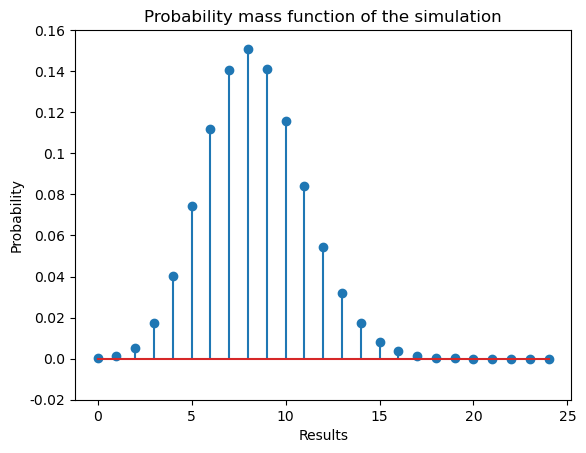

In [4]:
experiments = 10000
# Number of trials
n = 50
# Probability of success
p = 1/6
# Number of success per trial
k = 20
# Size of the vector (number of experiments)
initial_experiment_size = 100
size = (experiments, initial_experiment_size) # Return experiments x initial_experiment_size matrix

possible_values = np.arange(0, 25)

total_df = 0
total_df = pd.DataFrame({'Possible Results':possible_values})
total_df = total_df.set_index('Possible Results')
total_df['Total'] = 0

# Make experiments:
np.random.seed(42)
results = np.random.binomial(n, p, size)
for i in range(0,experiments):
    result = results[i,:]
    for result_i in result:
        total_df.loc[result_i,'Total'] = total_df.loc[result_i,'Total'] + 1
        
########################
probability = total_df.loc[k,'Total']/(experiments*initial_experiment_size)
theory_probability = math.factorial(n)/(math.factorial(k)*math.factorial(n-k))*p**k*(1-p)**(n-k)

print('Number of samples = {}'.format(k))
print('Probability of success = {}'.format(round(p,2)))
print('')
print('Simulated probability of getting {} in {} trials  = {}'.format(k, n, probability))
print('Theoretical probability of getting {} in {} trials  = {}'.format(k, n, theory_probability))
print('')

mean = results.mean()
var = results.var()  #Equivalent to flatten the array and calculate the variance

theory_mean = n*p
theory_var = n*p*(1-p)

print('Simulated mean = {}'.format(round(mean,2)))
print('Theoretical mean = {}'.format(round(theory_mean,2)))
print('')
print('Simulated var = {}'.format(round(var,2)))
print('Theoretical var = {}'.format(round(theory_var,2)))
    
plt.stem(total_df) 
locs, _ = plt.yticks()
plt.yticks(locs,np.round(locs/(experiments*initial_experiment_size),3))
plt.xlabel('Results')
plt.ylabel('Probability')
plt.title('Probability mass function of the simulation')
plt.show()